In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
the_host = "192.168.1.66"
the_database = "postgres"
the_user = "postgres"
the_password = "postgres"
the_port = 5432

conn = psycopg2.connect(database=the_database, user=the_user, password=the_password, host=the_host, port=the_port)
cur = conn.cursor()

In [3]:
sql = """
SELECT price_usd, btc_price_usd.the_date, nvtadj, bpt, sopr 
FROM btc_price_usd, btc_nvt, btc_bpt, btc_sopr
WHERE btc_price_usd.the_date = btc_nvt.the_date
AND btc_price_usd.the_date = btc_bpt.the_date
AND btc_price_usd.the_date = btc_sopr.the_date
AND btc_price_usd.the_date >= '2011-01-01' 
ORDER BY btc_price_usd.the_date;
"""
data = pd.read_sql_query(sql, conn)
corrMatrix = data.corr()
corrMatrix

,price_usd,nvtadj,bpt,sopr
price_usd,1.000000,0.118553,0.999908,0.440111
nvtadj,0.118553,1.000000,0.117269,0.350525
bpt,0.999908,0.117269,1.000000,0.448676
sopr,0.440111,0.350525,0.448676,1.000000


In [4]:
sql = """
SELECT price_usd, btc_price_usd.the_date, fear_greed, nvtadj, bpt, sopr, ssr
FROM btc_price_usd, btc_nvt, btc_bpt, btc_sopr, btc_fear_greed, btc_ssr
WHERE btc_fear_greed.the_date = btc_price_usd.the_date
AND btc_price_usd.the_date = btc_nvt.the_date
AND btc_price_usd.the_date = btc_bpt.the_date
AND btc_price_usd.the_date = btc_sopr.the_date
AND btc_price_usd.the_date = btc_ssr.the_date
AND btc_price_usd.the_date >= '2021-01-01' 
ORDER BY btc_price_usd.the_date;
"""
data = pd.read_sql_query(sql, conn)
corrMatrix = data.corr()
corrMatrix


,price_usd,fear_greed,nvtadj,bpt,sopr,ssr
price_usd,1.000000,0.668648,0.118553,0.999908,0.440111,0.995841
fear_greed,0.668648,1.000000,-0.165020,0.674464,0.769255,0.712835
nvtadj,0.118553,-0.165020,1.000000,0.117269,0.350525,0.060495
bpt,0.999908,0.674464,0.117269,1.000000,0.448676,0.996178
sopr,0.440111,0.769255,0.350525,0.448676,1.000000,0.461237
ssr,0.995841,0.712835,0.060495,0.996178,0.461237,1.000000


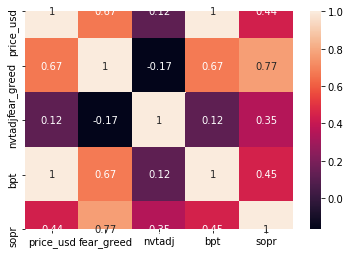

In [51]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [58]:
sql = """SELECT 100 - fear_greed AS fear_greed, price_usd, btc_price_usd.the_date FROM btc_fear_greed, btc_price_usd 
WHERE btc_fear_greed.the_date = btc_price_usd.the_date
AND btc_price_usd.the_date >= '2021-01-01' ORDER BY btc_price_usd.the_date;"""
sql = """SELECT fear_greed, price_usd, btc_price_usd.the_date FROM btc_fear_greed, btc_price_usd 
WHERE btc_fear_greed.the_date = btc_price_usd.the_date
AND btc_price_usd.the_date >= '2021-01-01' ORDER BY btc_price_usd.the_date;"""

sql = """SELECT 500 * fear_greed AS fear_greed, price_usd, btc_price_usd.the_date FROM btc_fear_greed, btc_price_usd 
WHERE btc_fear_greed.the_date = btc_price_usd.the_date
AND btc_price_usd.the_date >= '2021-01-01' ORDER BY btc_price_usd.the_date;"""

data = pd.read_sql_query(sql, conn)
columns = data[['fear_greed','price_usd']]
correlation = columns.corr(method='pearson')
correlation

,fear_greed,price_usd
fear_greed,1.000000,0.279903
price_usd,0.279903,1.000000


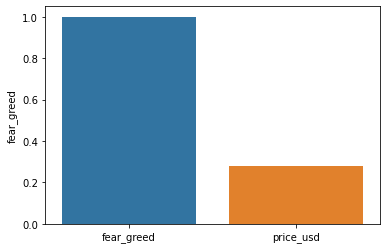

In [54]:
sns.barplot(x=correlation.index, y=correlation.fear_greed)

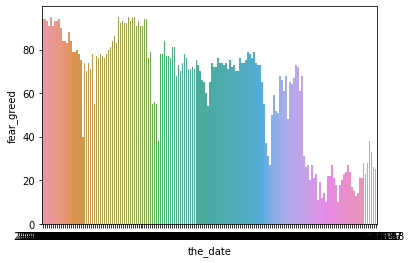

In [24]:
sns.barplot(x=data.the_date, y=data.fear_greed)

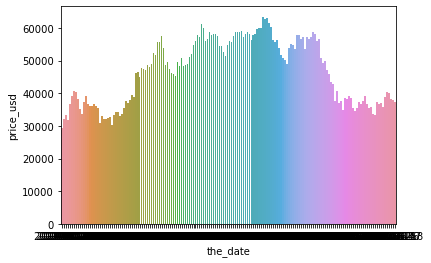

In [32]:
sns.barplot(x=data.the_date, y=data.price_usd)

<ipython-input-29-201b4d12c0c2>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


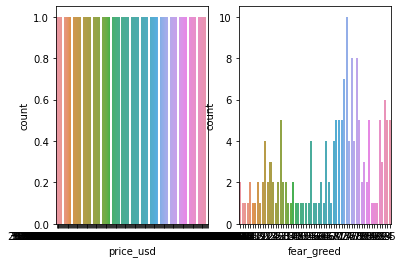

In [29]:
fig, ax = plt.subplots(1,2)
sns.countplot(data['price_usd'], ax=ax[0])
sns.countplot(data['fear_greed'], ax=ax[1])
fig.show()

In [36]:
# Hago la gráfica en matplotlib porque en google colaboration no se ven los gráficos de plotly
#plt.figure(figsize=(14,8))
#plt.plot(data['the_date'], data['price_usd'], label = 'price_usd')
#plt.plot(data['the_date'], data['fear_greed']*600, label = 'fear_greed')
#plt.plot()

#plt.title('XXX')
#plt.legend()
#plt.show()

     Método: kendall
price_usd     0.08859
fear_greed    1.00000
dtype: float64


Text(0.5, 1.0, 'XXX')

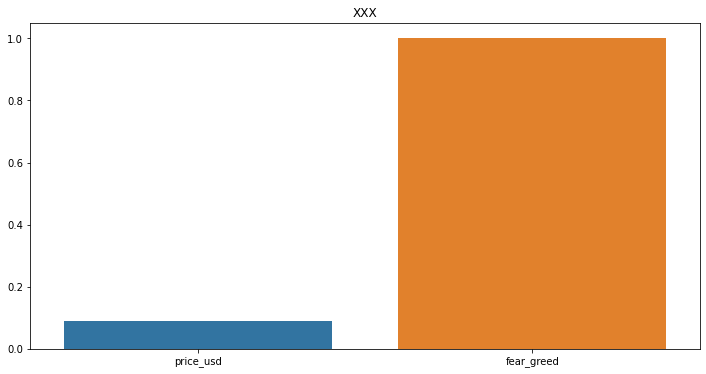

In [56]:
theMethod = 'kendall'
df = data.corrwith(data['fear_greed'], method=theMethod, axis = 0).sort_values(ascending=True).head()
print('     Método: ' + theMethod)
print(df)
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y=df.values).set_title('XXX')

In [43]:
sql = """SELECT fear_greed AS fear_greed, price_usd, btc_price_usd.the_date FROM btc_fear_greed, btc_price_usd 
WHERE btc_fear_greed.the_date = btc_price_usd.the_date
AND btc_price_usd.the_date >= '2021-01-01' ORDER BY btc_price_usd.the_date;"""

data = pd.read_sql_query(sql, conn)
columns = data[['fear_greed','price_usd']]
correlation = columns.corr(method='pearson')
correlation

,fear_greed,price_usd
fear_greed,1.000000,0.279903
price_usd,0.279903,1.000000


In [40]:
sql = """
SELECT price_usd, nvtadj, btc_price_usd.the_date 
FROM btc_price_usd, btc_nvt
WHERE btc_price_usd.the_date = btc_nvt.the_date
AND btc_price_usd.the_date >= '2011-01-01' 
ORDER BY btc_price_usd.the_date;"""
data = pd.read_sql_query(sql, conn)
columns = data[['price_usd', 'nvtadj']]
correlation = columns.corr(method='pearson')
correlation
#sns.barplot(x=correlation.index, y=correlation.nvtadj)

,price_usd,nvtadj
price_usd,1.000000,0.259045
nvtadj,0.259045,1.000000


In [42]:
sql = """
SELECT price_usd, bpt, btc_price_usd.the_date 
FROM btc_price_usd, btc_bpt
WHERE btc_price_usd.the_date = btc_bpt.the_date
AND btc_price_usd.the_date >= '2011-01-01' 
ORDER BY btc_price_usd.the_date;"""
data = pd.read_sql_query(sql, conn)
columns = data[['price_usd', 'bpt']]
correlation = columns.corr(method='pearson')
correlation
#sns.barplot(x=correlation.index, y=correlation.bpt)

,price_usd,bpt
price_usd,1.000000,0.214989
bpt,0.214989,1.000000


In [44]:
sql = """
SELECT price_usd, btc_price_usd.the_date, sopr
FROM btc_price_usd, btc_sopr
WHERE btc_price_usd.the_date = btc_sopr.the_date
AND btc_price_usd.the_date >= '2011-01-01' 
ORDER BY btc_price_usd.the_date;"""
data = pd.read_sql_query(sql, conn)
columns = data[['price_usd', 'sopr']]
correlation = columns.corr(method='pearson')
correlation
#sns.barplot(x=correlation.index, y=correlation.bpt)

,price_usd,sopr
price_usd,1.000000,0.492466
sopr,0.492466,1.000000


In [4]:
### Correlation metrics btc_indicator_percentage_history

sql = """select price_usd, btc_indicator_percentage_history.*
from btc_price_usd, btc_indicator_percentage_history 
where btc_price_usd.the_date = date(btc_indicator_percentage_history.the_date)
and btc_price_usd.the_date > '2021-05-21'; """

data = pd.read_sql_query(sql, conn)
corrMatrix = data.corr()
corrMatrix

,price_usd,nupl,s2fd,mvrvzscore,puell_multiple,reserve_risk,sopr,mayer_multiple,greed_fear,nvt_adj,day_returns_30,resume
price_usd,1.000000,-0.908071,-0.886885,-0.945736,-0.645817,-0.610681,-0.350563,-0.961960,-0.832880,0.132297,-0.695235,-0.767582
nupl,-0.908071,1.000000,0.957935,0.983579,0.686681,0.748664,0.408192,0.955019,0.904579,0.031472,0.809825,0.882519
s2fd,-0.886885,0.957935,1.000000,0.957526,0.547561,0.669748,0.314651,0.962889,0.826830,-0.001237,0.768566,0.818765
mvrvzscore,-0.945736,0.983579,0.957526,1.000000,0.688254,0.708337,0.391567,0.979956,0.912241,0.009037,0.801866,0.874641
puell_multiple,-0.645817,0.686681,0.547561,0.688254,1.000000,0.662337,0.393566,0.613941,0.725095,0.158546,0.565443,0.748651
reserve_risk,-0.610681,0.748664,0.669748,0.708337,0.662337,1.000000,0.369454,0.659767,0.706249,0.093657,0.623301,0.699069
sopr,-0.350563,0.408192,0.314651,0.391567,0.393566,0.369454,1.000000,0.350010,0.430428,-0.001523,0.392144,0.416897
mayer_multiple,-0.961960,0.955019,0.962889,0.979956,0.613941,0.659767,0.350010,1.000000,0.844569,-0.078173,0.756373,0.811648
greed_fear,-0.832880,0.904579,0.826830,0.912241,0.725095,0.706249,0.430428,0.844569,1.000000,0.170816,0.860972,0.907624
nvt_adj,0.132297,0.031472,-0.001237,0.009037,0.158546,0.093657,-0.001523,-0.078173,0.170816,1.000000,0.253548,0.317571


In [6]:
# Desplazamos los precios un día
data['price_1'] = data['price_usd'].shift(1)

In [7]:
data.head()

,price_usd,nupl,s2fd,mvrvzscore,puell_multiple,reserve_risk,sopr,mayer_multiple,greed_fear,nvt_adj,day_returns_30,resume,the_date,price_1
0,37643.419798,52.0,115.0,82.0,92.0,101.0,103.0,94.0,88.0,98.0,91.25,91.63,2021-05-22 12:48:16.482177,NaN
1,34774.207222,52.0,116.0,82.0,92.0,101.0,103.0,94.0,88.0,98.0,90.42,91.64,2021-05-23 01:00:07.022213,37643.419798
2,38630.409119,56.0,117.0,85.0,92.0,101.0,103.0,95.0,86.0,88.0,88.75,91.18,2021-05-24 01:00:06.517496,34774.207222
3,38269.771075,54.0,116.0,83.0,93.0,101.0,103.0,94.0,90.0,89.0,91.67,91.47,2021-05-25 01:00:06.964099,38630.409119
4,39194.858898,52.0,115.0,82.0,91.0,101.0,96.0,94.0,78.0,89.0,91.25,88.93,2021-05-26 01:00:06.023741,38269.771075


In [8]:
corrMatrix = data.corr()
corrMatrix

,price_usd,nupl,s2fd,mvrvzscore,puell_multiple,reserve_risk,sopr,mayer_multiple,greed_fear,nvt_adj,day_returns_30,resume,price_1
price_usd,1.000000,-0.908071,-0.886885,-0.945736,-0.645817,-0.610681,-0.350563,-0.961960,-0.832880,0.132297,-0.695235,-0.767582,0.626785
nupl,-0.908071,1.000000,0.957935,0.983579,0.686681,0.748664,0.408192,0.955019,0.904579,0.031472,0.809825,0.882519,-0.657282
s2fd,-0.886885,0.957935,1.000000,0.957526,0.547561,0.669748,0.314651,0.962889,0.826830,-0.001237,0.768566,0.818765,-0.615371
mvrvzscore,-0.945736,0.983579,0.957526,1.000000,0.688254,0.708337,0.391567,0.979956,0.912241,0.009037,0.801866,0.874641,-0.624021
puell_multiple,-0.645817,0.686681,0.547561,0.688254,1.000000,0.662337,0.393566,0.613941,0.725095,0.158546,0.565443,0.748651,-0.442111
reserve_risk,-0.610681,0.748664,0.669748,0.708337,0.662337,1.000000,0.369454,0.659767,0.706249,0.093657,0.623301,0.699069,-0.467390
sopr,-0.350563,0.408192,0.314651,0.391567,0.393566,0.369454,1.000000,0.350010,0.430428,-0.001523,0.392144,0.416897,-0.226920
mayer_multiple,-0.961960,0.955019,0.962889,0.979956,0.613941,0.659767,0.350010,1.000000,0.844569,-0.078173,0.756373,0.811648,-0.601217
greed_fear,-0.832880,0.904579,0.826830,0.912241,0.725095,0.706249,0.430428,0.844569,1.000000,0.170816,0.860972,0.907624,-0.525535
nvt_adj,0.132297,0.031472,-0.001237,0.009037,0.158546,0.093657,-0.001523,-0.078173,0.170816,1.000000,0.253548,0.317571,0.114049


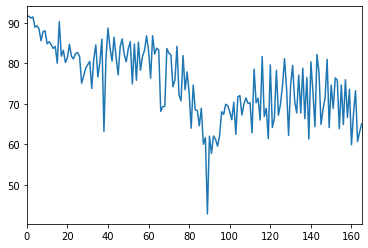

In [9]:
data['resume'].plot()

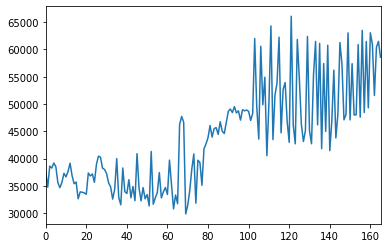

In [10]:
data['price_usd'].plot()

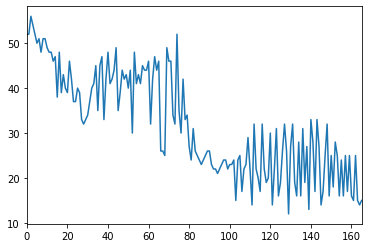

In [8]:
data

,price_usd,nupl,s2fd,mvrvzscore,puell_multiple,reserve_risk,sopr,mayer_multiple,greed_fear,nvt_adj,day_returns_30,resume,the_date
0,37643.419798,52.0,115.0,82.0,92.0,101.0,103.0,94.0,88.0,98.0,91.25,91.63,2021-05-22 12:48:16.482177
1,34774.207222,52.0,116.0,82.0,92.0,101.0,103.0,94.0,88.0,98.0,90.42,91.64,2021-05-23 01:00:07.022213
2,38630.409119,56.0,117.0,85.0,92.0,101.0,103.0,95.0,86.0,88.0,88.75,91.18,2021-05-24 01:00:06.517496
3,38269.771075,54.0,116.0,83.0,93.0,101.0,103.0,94.0,90.0,89.0,91.67,91.47,2021-05-25 01:00:06.964099
4,39194.858898,52.0,115.0,82.0,91.0,101.0,96.0,94.0,78.0,89.0,91.25,88.93,2021-05-26 01:00:06.023741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,60932.063212,15.0,102.0,51.0,82.0,99.0,92.0,75.0,29.0,97.0,62.50,67.65,2021-10-16 01:01:11.656001
162,51558.049332,25.0,106.0,65.0,83.0,99.0,98.0,83.0,46.0,92.0,77.08,73.24,2021-10-05 01:01:10.841068
163,60393.980274,15.0,101.0,50.0,78.0,99.0,95.0,74.0,28.0,77.0,55.83,60.68,2021-10-26 01:01:09.645546
164,61462.222372,14.0,101.0,49.0,80.0,99.0,91.0,75.0,22.0,98.0,62.92,62.99,2021-10-17 01:01:16.870771


In [41]:
sql = """select price_usd, btc_buy_indicator.*
from btc_price_usd, btc_buy_indicator
where date(btc_price_usd.the_date) = date(btc_buy_indicator.the_date)
and btc_price_usd.the_date > '2021-05-21' 
and to_number(to_char(btc_buy_indicator.the_date, 'HH24'),'99G999D9S') > 22;"""

data = pd.read_sql_query(sql, conn)
corrMatrix = data.corr()
corrMatrix

,price_usd,id,nupl,s2fd,mvrvzscore,puell_multiple,reserve_risk,sopr,hodl_waves,mayer_multiple,pi_cycle
price_usd,1.000000,0.882244,0.962422,0.990404,0.980649,0.743599,0.950902,0.360505,-0.607282,0.994806,-0.773054
id,0.882244,1.000000,0.835627,0.856395,0.822772,0.630799,0.724494,0.315120,-0.524609,0.850765,-0.931760
nupl,0.962422,0.835627,1.000000,0.961562,0.987389,0.807357,0.966197,0.431058,-0.640332,0.949872,-0.800762
s2fd,0.990404,0.856395,0.961562,1.000000,0.983183,0.744500,0.965644,0.349077,-0.580088,0.991218,-0.734667
mvrvzscore,0.980649,0.822772,0.987389,0.983183,1.000000,0.797170,0.986445,0.402594,-0.628463,0.975200,-0.747733
puell_multiple,0.743599,0.630799,0.807357,0.744500,0.797170,1.000000,0.784772,0.411867,-0.642059,0.726375,-0.654910
reserve_risk,0.950902,0.724494,0.966197,0.965644,0.986445,0.784772,1.000000,0.390627,-0.610354,0.956049,-0.639948
sopr,0.360505,0.315120,0.431058,0.349077,0.402594,0.411867,0.390627,1.000000,-0.470120,0.354036,-0.338992
hodl_waves,-0.607282,-0.524609,-0.640332,-0.580088,-0.628463,-0.642059,-0.610354,-0.470120,1.000000,-0.599815,0.522358
mayer_multiple,0.994806,0.850765,0.949872,0.991218,0.975200,0.726375,0.956049,0.354036,-0.599815,1.000000,-0.718905


In [42]:
# Desplazamos los precios un día
data['price_1'] = data['price_usd'].shift(1)
data['nupl_1'] = data['nupl'].shift(1)
data['nupl_-1'] = data['nupl'].shift(-1)
data['nupl_diff'] = data['nupl_1'] - data['nupl']
data['price_diff'] = data['price_1'] - data['price_usd']


In [46]:
data[['price_usd', 'price_1', 'price_diff', 'nupl', 'nupl_1', 'nupl_diff', 'nupl_-1']]


,nupl_buy,price_diff_10
0,-1,-1
1,-1,1
2,1,1
3,-1,-1
4,-1,1
...,...,...
144,-1,-1
145,-1,1
146,1,1
147,1,1


In [47]:
data['nupl_buy'] = data.apply(lambda x: 1 if x['nupl_diff'] >= 0 else -1, axis=1)
data['price_diff_10'] = data.apply(lambda x: 1 if x['price_diff'] >= 0 else -1, axis=1)
data[['nupl_buy', 'price_diff_10']]

Ok:102
Ko:47


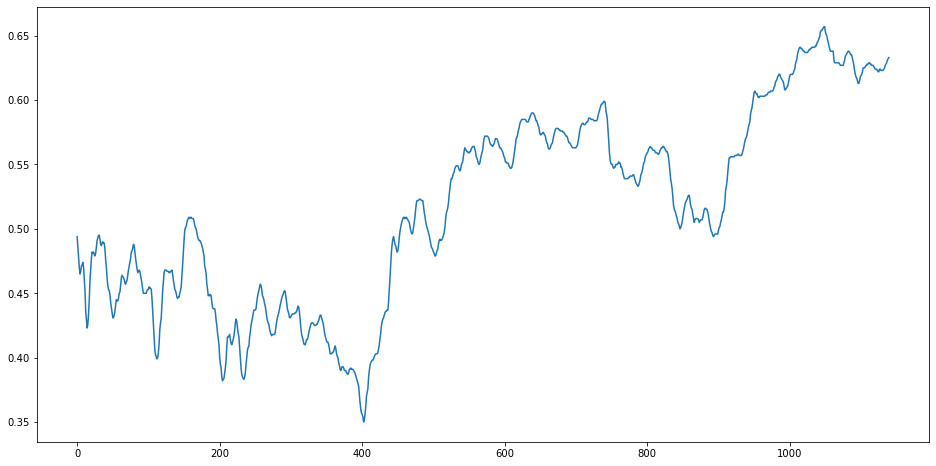

In [11]:
ok = 0
ko = 0

for idx, row in data.iterrows():
    if row['nupl_buy'] == row['price_diff_10']:
        ok+=1
    else:
        ko+=1

print("Ok:" + str(ok))
print("Ko:" + str(ko))

In [15]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot()
plt.plot(data['nupl'])
plt.show()

In [18]:
d

,nupl_buy,price_diff_10
0,-1,-1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1135,-1,1
1136,-1,-1
1137,-1,1
1138,-1,1


In [32]:
ok = 0
ko = 0

for idx, row in data.iterrows():
    if row['nupl_buy'] == row['price_diff_10']:
        ok+=1
    else:
        ko+=1

print("Ok:" + str(ok))
print("Ko:" + str(ko))
                

Ok:641
Ko:499
